# KAIM 2019

# Gaussian Process

In [ ]:
import GPy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import ipywidgets as widgets

from ipywidgets import Button, HBox, VBox
from ipywidgets import interact

In [131]:
# Visualizing Kernel

def display_kernel(x):
    if x is 'Linear':
        k = GPy.kern.Linear(1)
    elif x == 'Periodic':
        k = GPy.kern.Cosine(1)
    elif x == 'RBF':
        k = GPy.kern.RBF(1)  
    else:
        k = GPy.kern.Matern32(1)

    k.plot()
    plt.title('Visualizing Kernels')

kernel_select = widgets.ToggleButtons(
    options=['Linear', 'Periodic', 'RBF', 'Matern32'],
    description='Kernel:',
    disabled=False,
    button_style='')

kernel_display = interact(display_kernel,x=kernel_select)

interactive(children=(ToggleButtons(description='Kernel:', options=('Linear', 'Periodic', 'RBF', 'Matern32'), …

In [132]:
# Sampling from different kernels

def sample_kernel(x):
    if x is 'Linear':
        k = GPy.kern.Linear(1)
    elif x == 'Periodic':
        k = GPy.kern.Cosine(1)
    elif x == 'RBF':
        k = GPy.kern.RBF(1)  
    else:
        k = GPy.kern.Matern32(1)
    
    x = np.linspace(-3,3, 50).reshape(-1,1)
    K = k.K(x)
    y = np.random.multivariate_normal(np.zeros(50), K, 5)
    for k_y in y:
        plt.plot(x, k_y, c='r', alpha=0.7)
    plt.title('Sampling from Kernels')

kernel_select = widgets.ToggleButtons(
    options=['Linear', 'Periodic', 'RBF', 'Matern32'],
    description='Kernel:',
    disabled=False,
    button_style='')

kernel_display = interact(sample_kernel,x=kernel_select)

interactive(children=(ToggleButtons(description='Kernel:', options=('Linear', 'Periodic', 'RBF', 'Matern32'), …

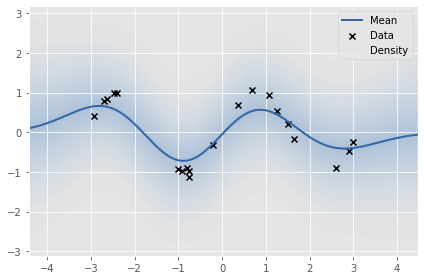

In [72]:
# GP Regression & Cavariance matix
X = np.random.uniform(-3.,3.,(20,1))
Y = np.sin(2*X) + np.random.randn(20,1)*0.05

kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

m = GPy.models.GPRegression(X,Y,kernel)

fig = m.plot(plot_density=True)

In [137]:
m.optimize(messages=True)

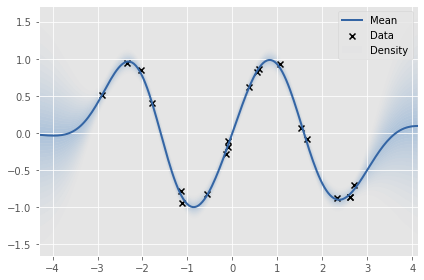

In [71]:
fig = m.plot(plot_density=True)

In [136]:
X = np.random.uniform(-3.,3.,(20,1))
Y = np.sin(2*X)+ np.random.randn(20,1)*0.05

    
def display_kernel(x):
    if x is 'Linear':
        kernel = GPy.kern.Linear(1)
    elif x == 'Periodic':
        kernel = GPy.kern.Cosine(1)
    elif x == 'RBF':
        kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.) 
    else:
        kernel = GPy.kern.Matern32(1)


    m = GPy.models.GPRegression(X,Y,kernel)
    m.optimize(messages=False, max_iters=2500)
    m.optimize_restarts(num_restarts=2)
    
    m.plot(plot_limits=(-4, 4))
    plt.title('Effect of Kernels on GPs')
    del m
    

kernel_select = widgets.ToggleButtons(
    options=['Linear', 'Periodic', 'RBF', 'Matern32'],
    description='Kernel:',
    disabled=False,
    button_style='')

model_display = interact(display_kernel,x=kernel_select)

interactive(children=(ToggleButtons(description='Kernel:', options=('Linear', 'Periodic', 'RBF', 'Matern32'), …